# ANÁLISIS EXPLORATORIO DE RUIDO POR SENSOR (EDA)

Este notebook procesa todos los archivos CSV en ./data y genera visualizaciones exploratorias para cada sensor.
En lugar de generar PDFs, las gráficas se muestran directamente en el notebook para su revisión visual e interpretación.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta base del proyecto (carpeta donde está el notebook)
BASE_DIR = os.getcwd()

# Subir dos niveles hasta la raíz del proyecto
BASE_DIR = os.path.abspath(os.path.join(BASE_DIR, "../../"))

# Ruta hacia la carpeta de datos
DATA_DIR = os.path.join(BASE_DIR, "data")

# Crear carpeta de datos si no existe
os.makedirs(DATA_DIR, exist_ok=True)

sns.set(style="whitegrid")

print("Carpeta de datos configurada:", DATA_DIR)

Carpeta de datos configurada: c:\Users\arian\Documents\ruido-cuenca\data


## FUNCIÓN PRINCIPAL DE ANÁLISIS PARA UN SENSOR

Esta función genera todas las visualizaciones y estadísticas básicas para un archivo CSV de un sensor.

In [10]:
def analizar_sensor(csv_path: str):
    nombre_sensor = os.path.splitext(os.path.basename(csv_path))[0]
    print(f"\n=== Analizando sensor: {nombre_sensor} ===")

    # ------------------------------------------------------
    # Cargar y validar datos
    # ------------------------------------------------------
    df = pd.read_csv(csv_path)

    if df.empty:
        print(f"Archivo vacío: {csv_path}")
        return

    columnas_requeridas = {"fecha", "hora", "decibelios"}
    if not columnas_requeridas.issubset(df.columns):
        print(f"Columnas faltantes en {csv_path}: {set(columnas_requeridas) - set(df.columns)}")
        return

    # ------------------------------------------------------
    # Procesamiento temporal
    # ------------------------------------------------------
    df["timestamp"] = pd.to_datetime(df["fecha"] + " " + df["hora"], errors="coerce")
    df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")
    df["decibelios"] = pd.to_numeric(df["decibelios"], errors="coerce")
    df = df.dropna(subset=["timestamp", "decibelios"])

    # =====================================================
    # 1. Resumen general
    # =====================================================
    display(df["decibelios"].describe().to_frame("valor").T)

    # =====================================================
    # 2–5. Cuatro gráficos en un grid 2x2
    # =====================================================
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f"Análisis exploratorio - {nombre_sensor}", fontsize=16, weight="bold")

    # =====================================================
    # 2. Evolución temporal y promedio diario
    # =====================================================
    daily_avg = df.groupby("fecha")["decibelios"].mean()
    sns.lineplot(data=df, x="timestamp", y="decibelios", linewidth=0.5, ax=axes[0, 0], label="Mediciones horarias")
    axes[0, 0].plot(daily_avg.index, daily_avg.values, color="red", linewidth=1.5, label="Promedio diario")
    axes[0, 0].set_title("Evolución temporal y promedio diario")
    axes[0, 0].set_ylabel("Decibelios (dB)")
    axes[0, 0].set_xlabel("Tiempo")
    axes[0, 0].legend()

    # =====================================================
    # 3. Histograma + KDE
    # =====================================================
    sns.histplot(df["decibelios"], bins=40, kde=True, ax=axes[0, 1])
    axes[0, 1].set_title("Distribución de niveles de ruido")
    axes[0, 1].set_xlabel("Decibelios (dB)")
    axes[0, 1].set_ylabel("Frecuencia")

    # =====================================================
    # 4. Boxplot mensual
    # =====================================================
    df["mes"] = df["timestamp"].dt.to_period("M").astype(str)
    sns.boxplot(data=df, x="mes", y="decibelios", ax=axes[1, 0])
    axes[1, 0].set_title("Distribución mensual de decibelios")
    axes[1, 0].tick_params(axis="x", rotation=45)
    axes[1, 0].set_xlabel("Mes")
    axes[1, 0].set_ylabel("Decibelios (dB)")

    # =====================================================
    # 5. Boxplot por hora
    # =====================================================
    df["hora_num"] = pd.to_datetime(df["hora"], format="%H:%M", errors="coerce").dt.hour
    sns.boxplot(data=df, x="hora_num", y="decibelios", ax=axes[1, 1])
    axes[1, 1].set_title("Distribución horaria del ruido")
    axes[1, 1].set_xlabel("Hora del día")
    axes[1, 1].set_ylabel("Decibelios (dB)")

    # ------------------------------------------------------
    # Ajustes finales
    # ------------------------------------------------------
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

Se encontraron 8 archivos CSV en c:\Users\arian\Documents\ruido-cuenca\data


=== Analizando sensor: ruido_SCP01 ===


,count,mean,std,min,25%,50%,75%,max
valor,49407.0,47.277623,6.391607,39.03,42.54,45.37,49.87,72.91


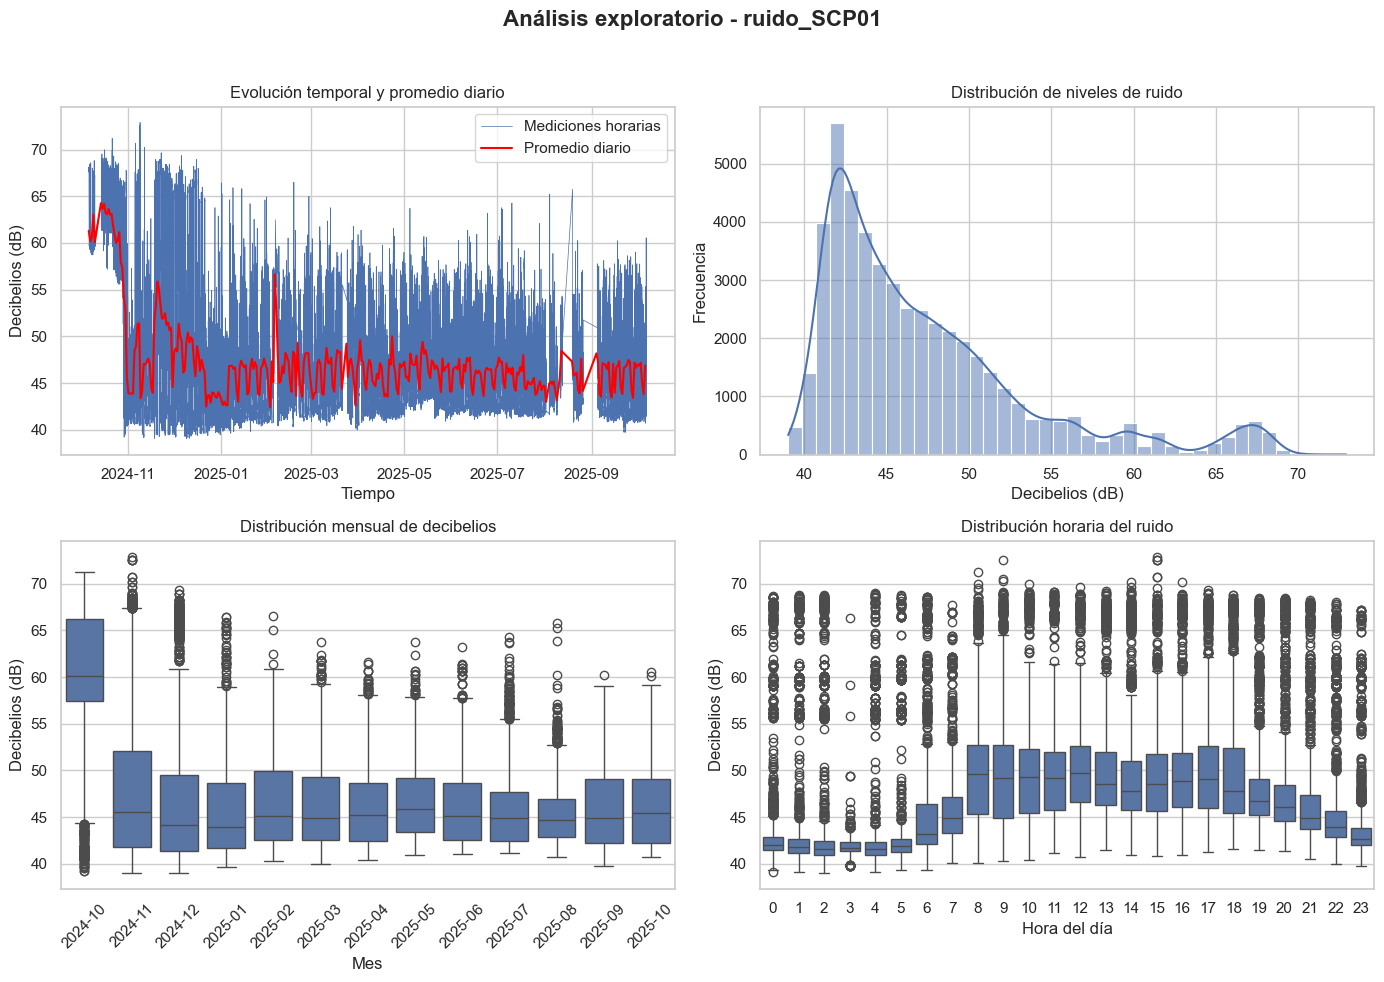


=== Analizando sensor: ruido_SCP06 ===


,count,mean,std,min,25%,50%,75%,max
valor,43404.0,65.69273,5.504448,42.74,63.28,67.63,69.14,87.19


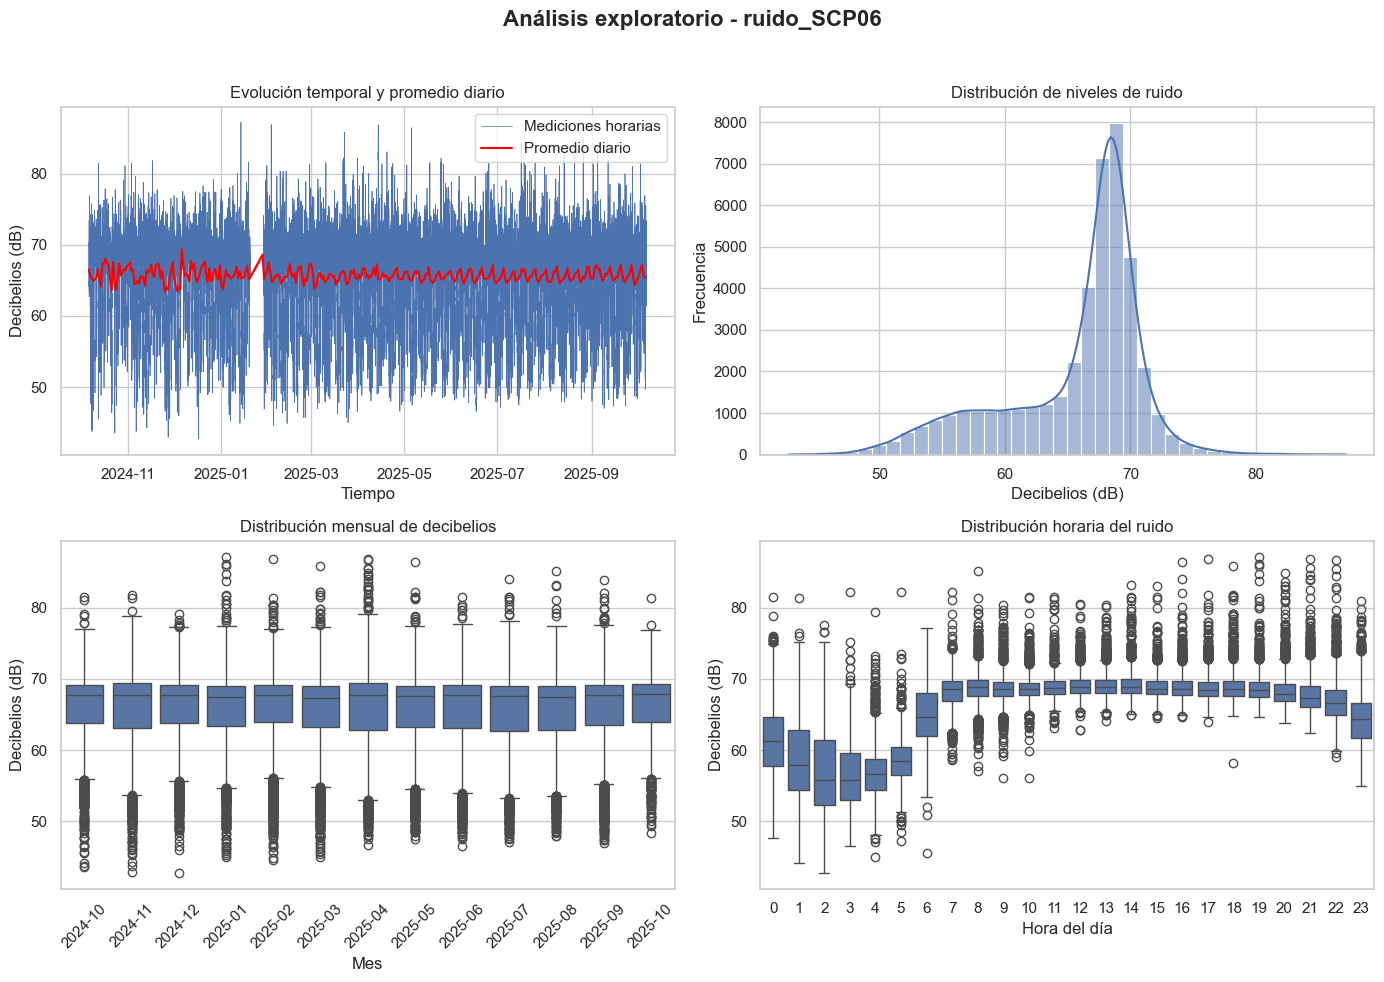


=== Analizando sensor: ruido_SCP07 ===


,count,mean,std,min,25%,50%,75%,max
valor,26773.0,64.323188,6.286848,37.25,61.7,66.72,68.19,95.22


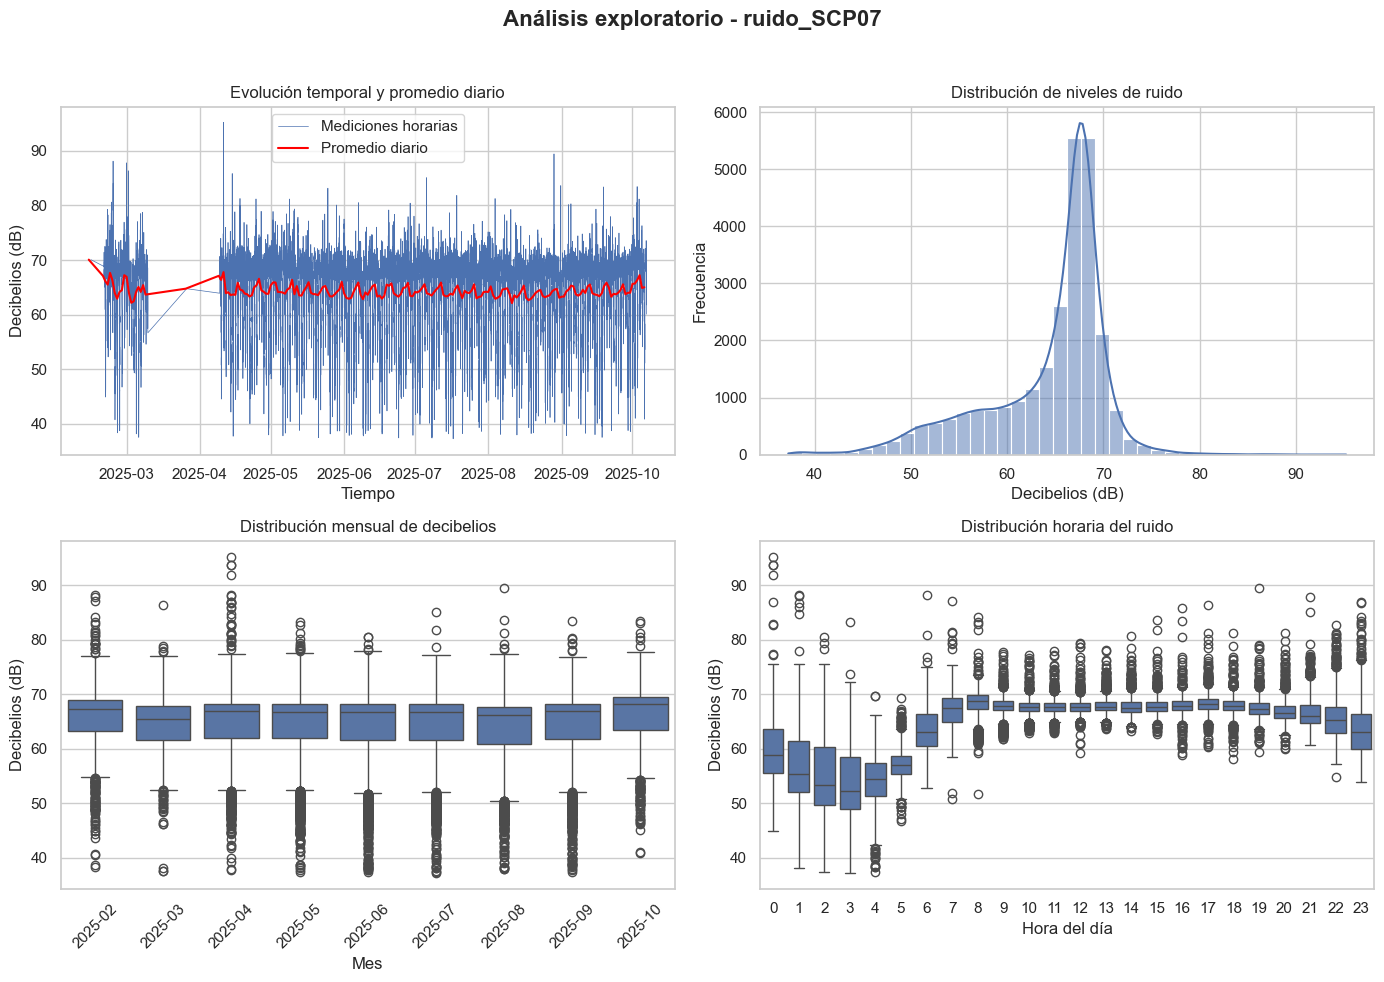


=== Analizando sensor: ruido_SCP08 ===


,count,mean,std,min,25%,50%,75%,max
valor,31004.0,68.337698,3.581624,54.14,66.45,69.36,70.72,89.93


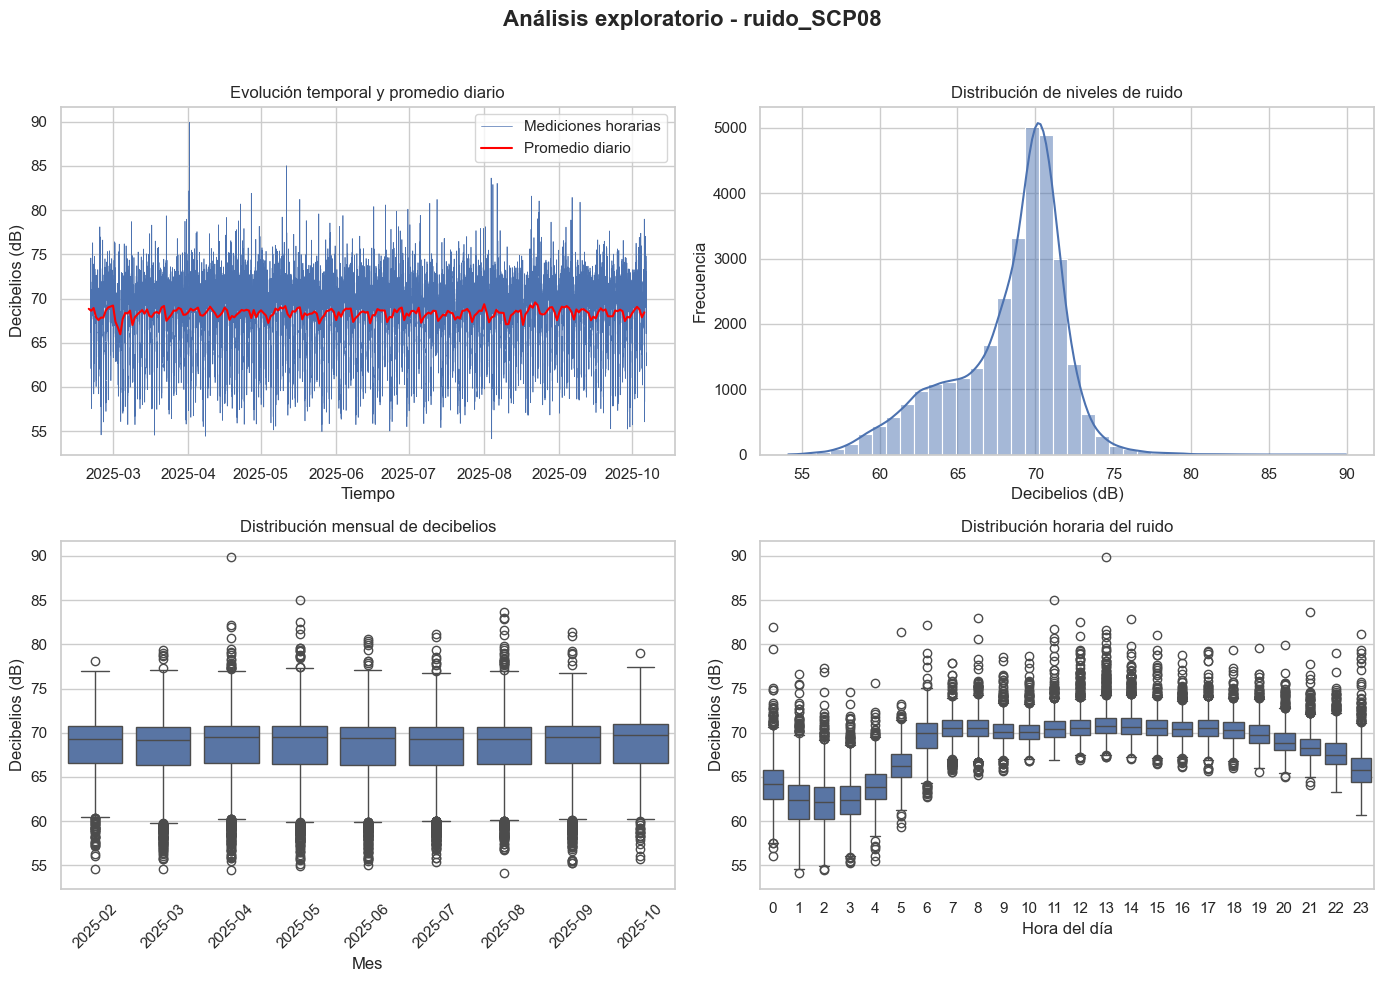


=== Analizando sensor: ruido_SCP09 ===


,count,mean,std,min,25%,50%,75%,max
valor,23649.0,73.208913,4.18616,57.06,70.58,74.68,76.38,86.4


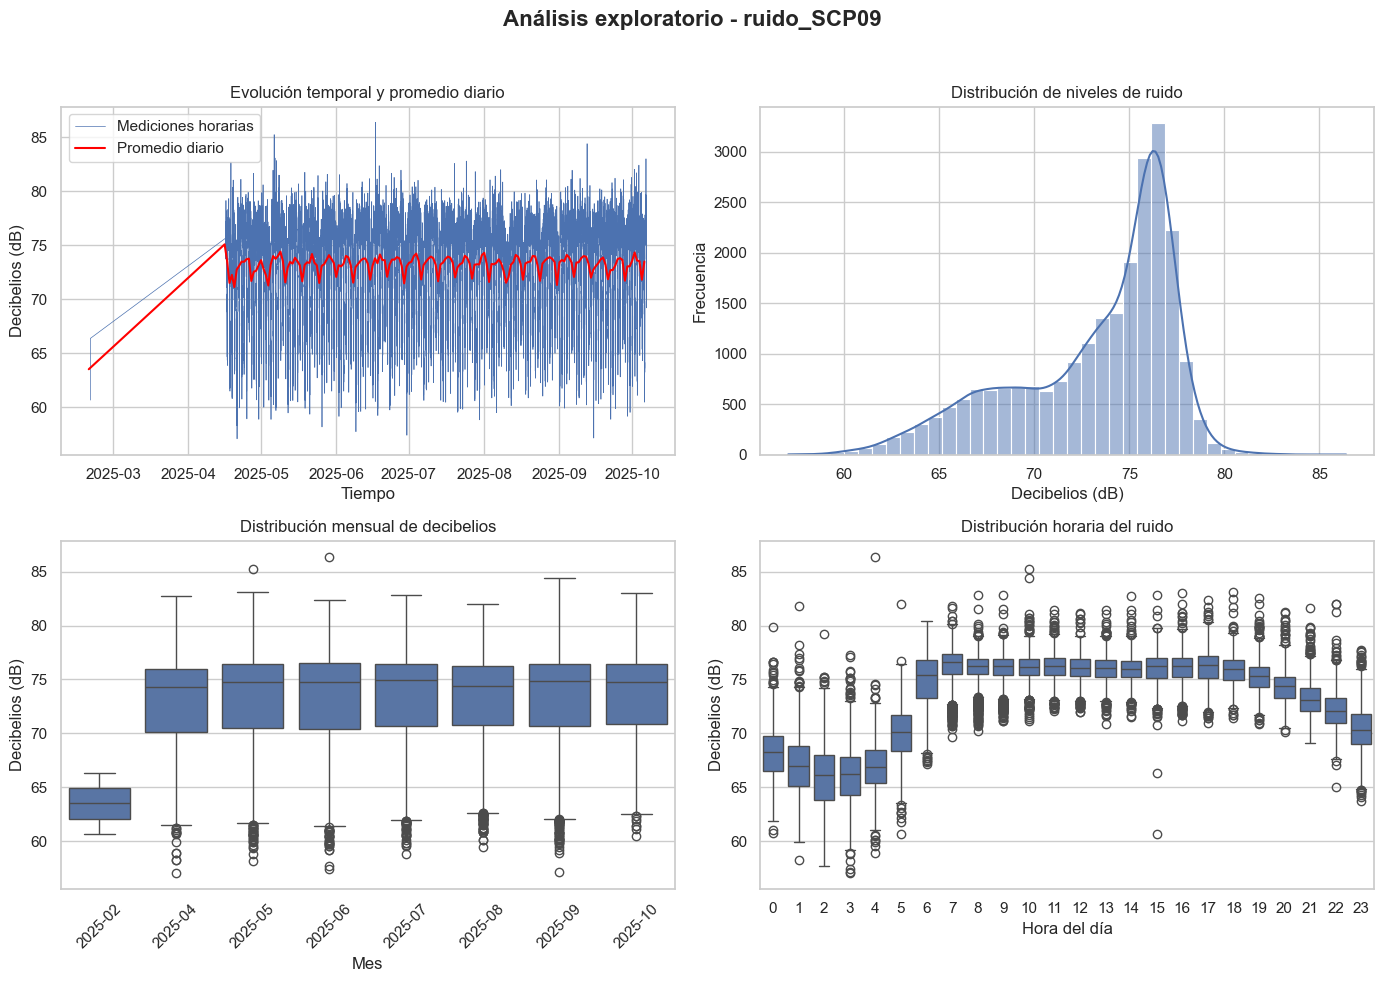


=== Analizando sensor: ruido_SCP13 ===


,count,mean,std,min,25%,50%,75%,max
valor,30488.0,71.504344,4.410519,52.76,69.19,72.96,74.4225,87.83


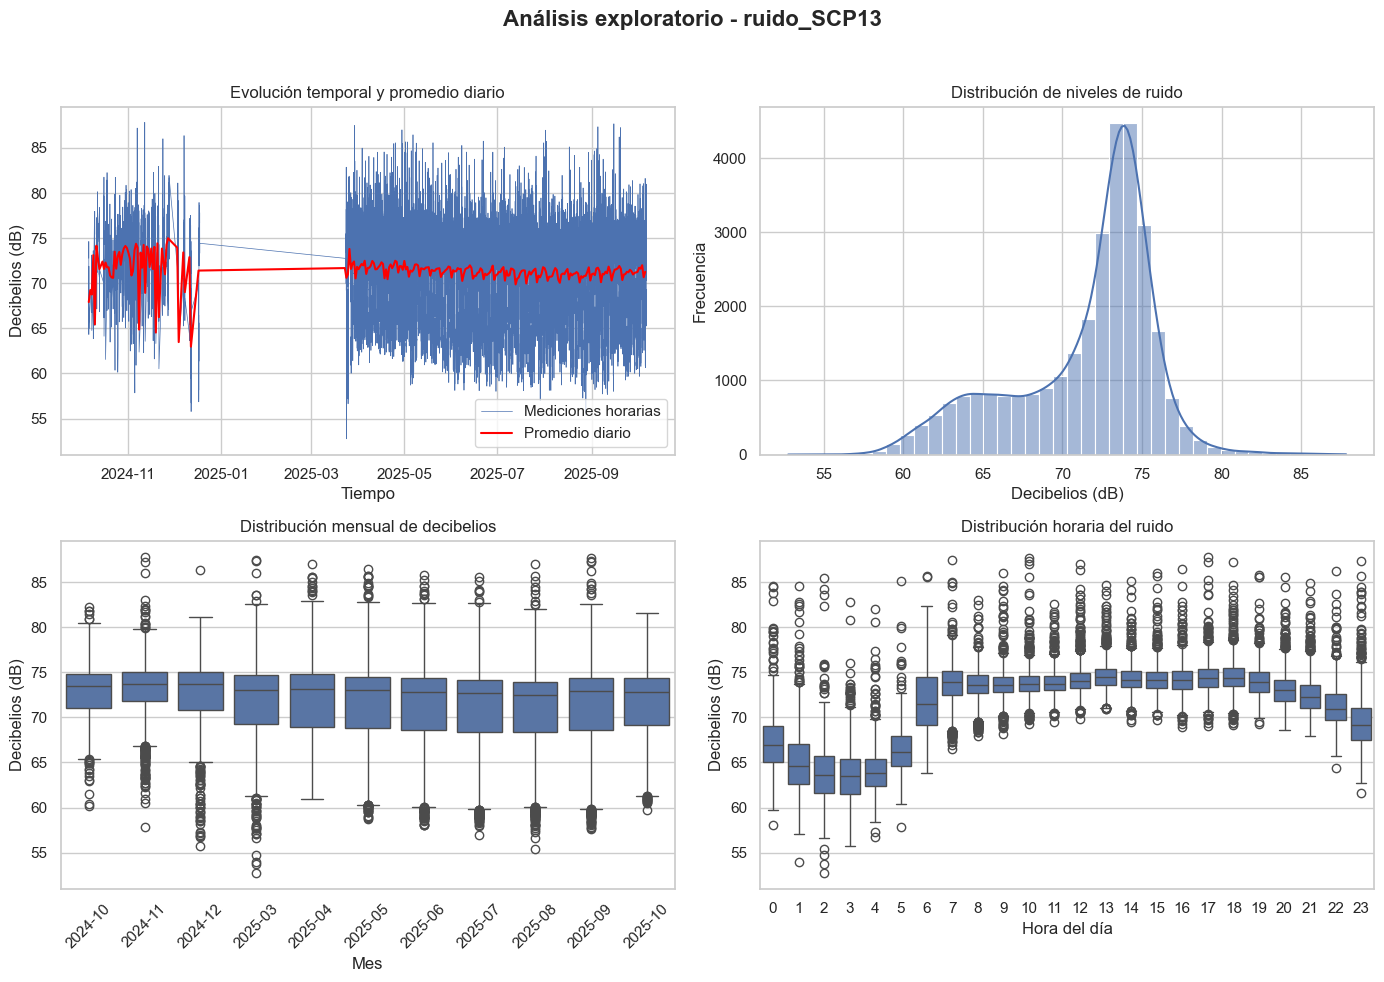


=== Analizando sensor: ruido_SCP16 ===


,count,mean,std,min,25%,50%,75%,max
valor,23170.0,67.754099,5.241946,47.69,65.21,69.6,71.18,84.7


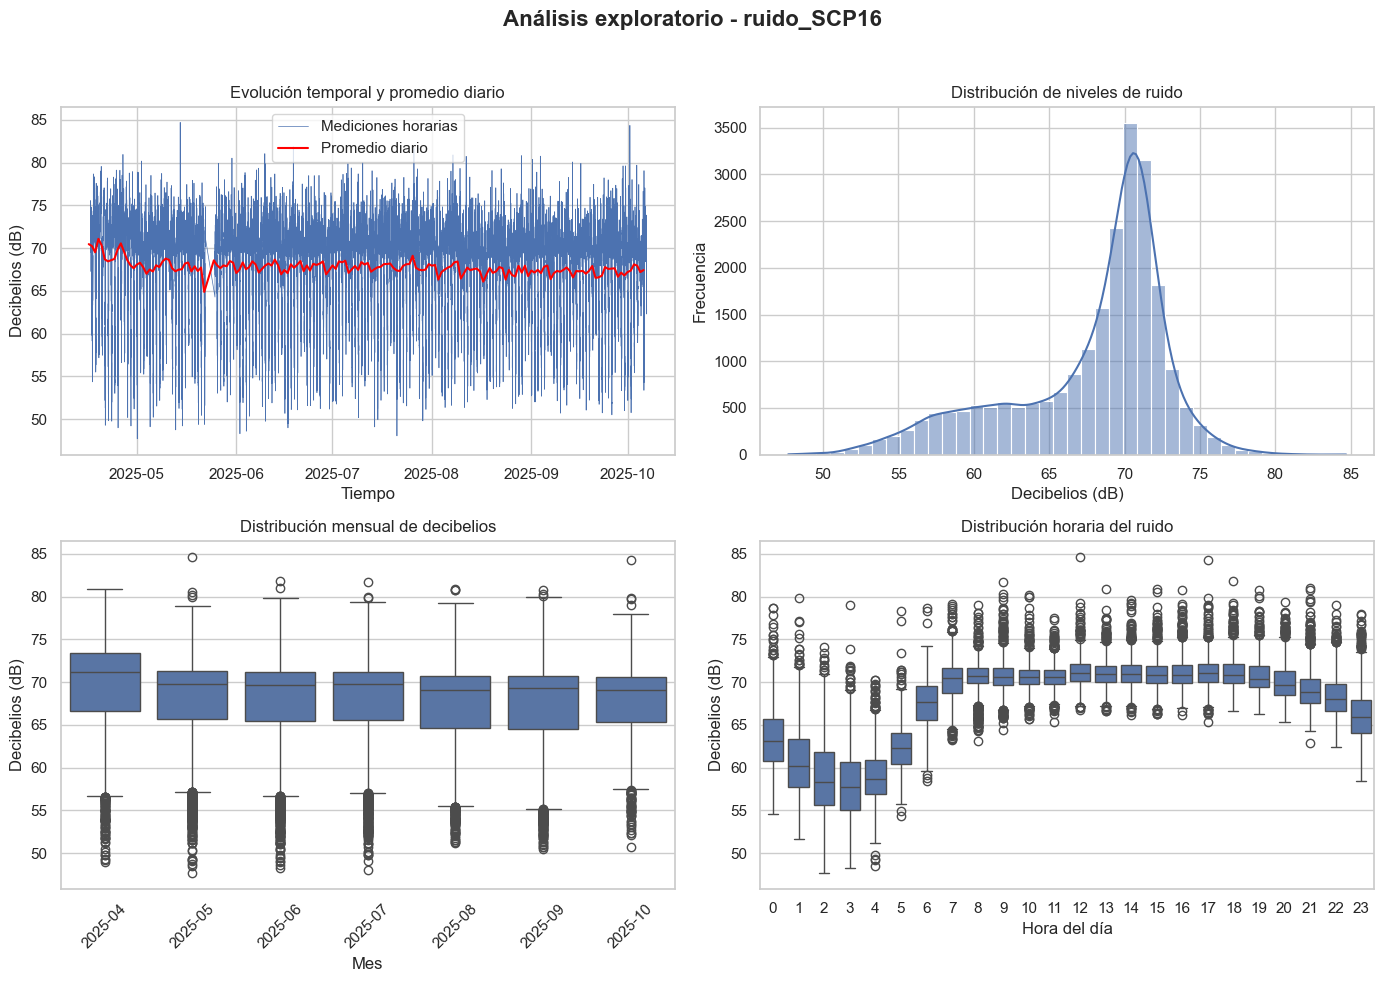


=== Analizando sensor: ruido_SCP17 ===


,count,mean,std,min,25%,50%,75%,max
valor,23763.0,67.324709,5.483255,46.88,64.335,69.4,71.36,86.73


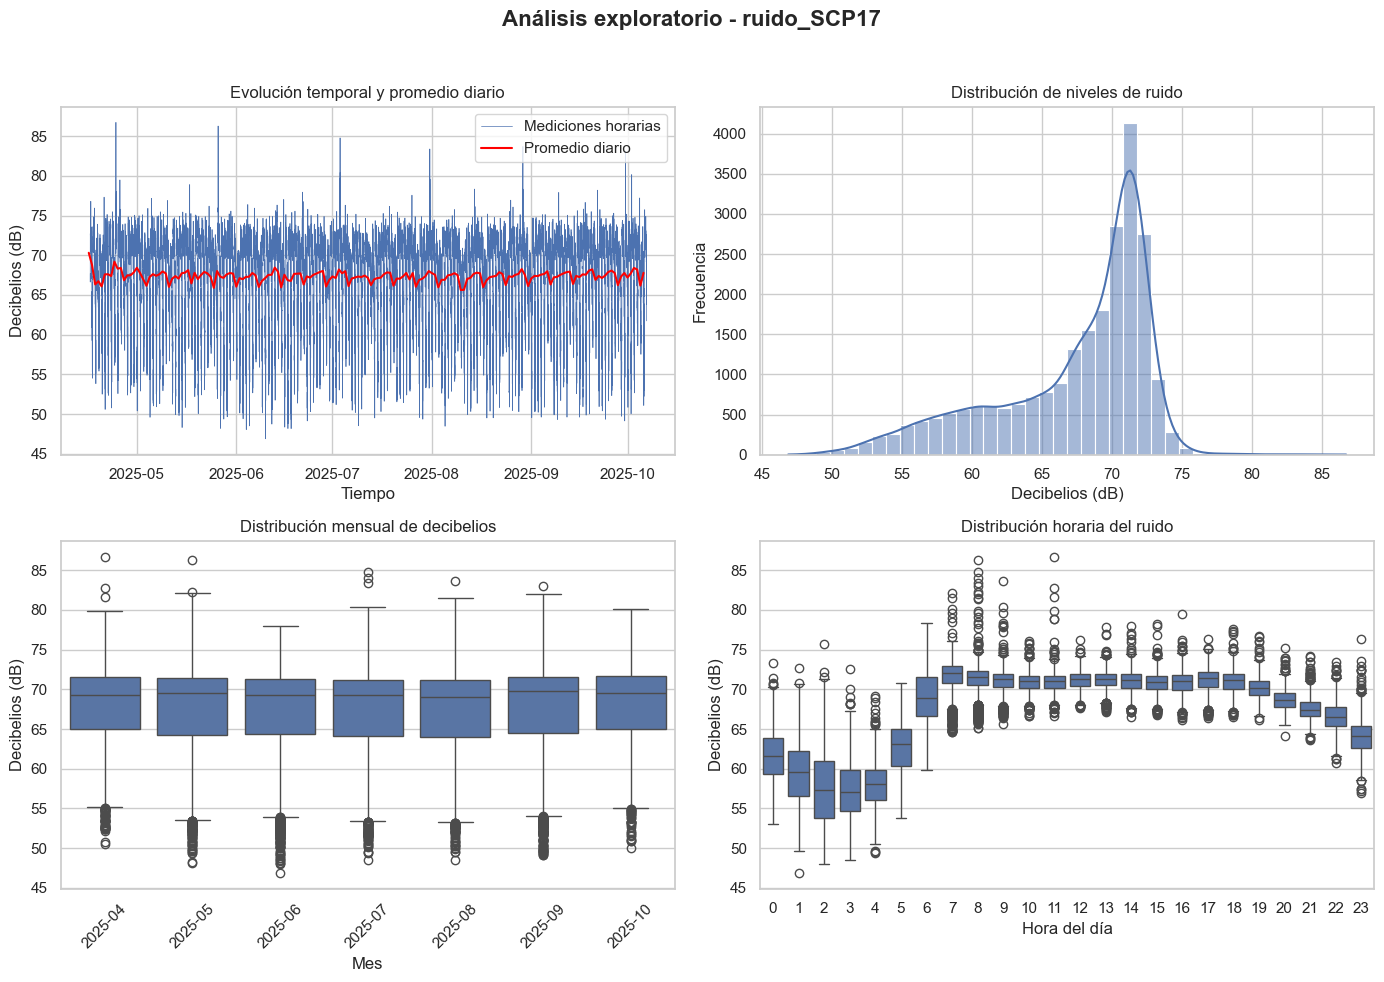

In [11]:
archivos_csv = [
    os.path.join(DATA_DIR, f)
    for f in os.listdir(DATA_DIR)
    if f.endswith(".csv")
]

# Verificar si existen archivos
if not archivos_csv:
    print("No se encontraron archivos CSV en la carpeta de datos.")
else:
    print(f"Se encontraron {len(archivos_csv)} archivos CSV en {DATA_DIR}\n")

    # Iterar y analizar cada archivo
    for csv_path in archivos_csv:
        try:
            analizar_sensor(csv_path)
        except Exception as e:
            print(f"Error procesando {csv_path}: {e}")


=== Análisis de intervalos temporales: ruido_SCP01 ===


,count,mean,std,min,25%,50%,75%,90%,95%,max
diff_segundos,49406.0,639.98,5090.83,0.0,600.0,600.0,660.0,660.0,660.0,797940.0


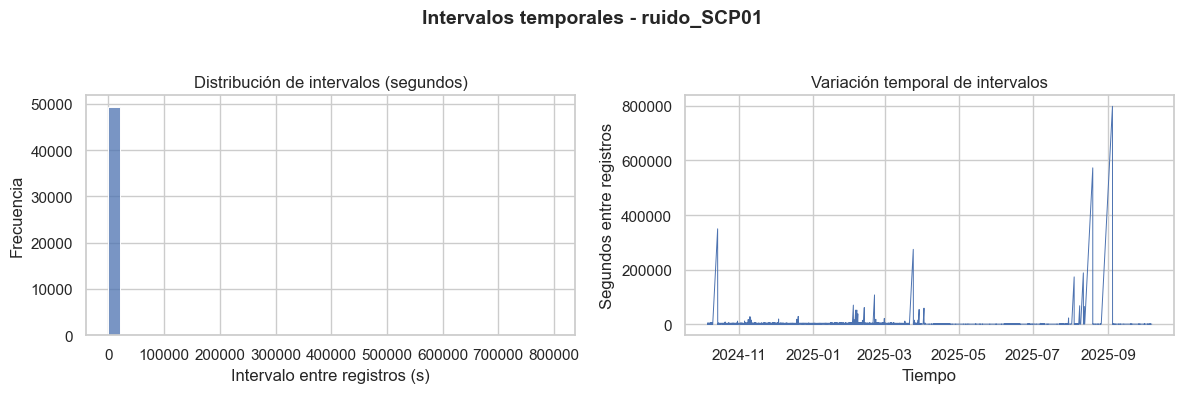

⚠️ Se detectaron 37 huecos grandes (>7200.0 s):

=== Análisis de intervalos temporales: ruido_SCP06 ===


,count,mean,std,min,25%,50%,75%,90%,95%,max
diff_segundos,43403.0,728.28,3743.24,0.0,600.0,600.0,660.0,660.0,660.0,756300.0


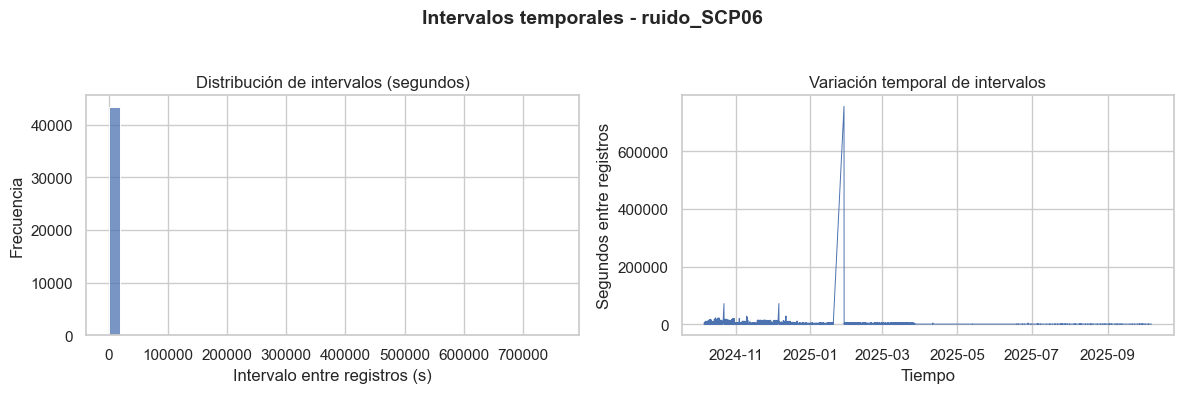

⚠️ Se detectaron 101 huecos grandes (>7200.0 s):

=== Análisis de intervalos temporales: ruido_SCP07 ===


,count,mean,std,min,25%,50%,75%,90%,95%,max
diff_segundos,26772.0,758.63,11762.3,60.0,600.0,660.0,660.0,660.0,660.0,1417380.0


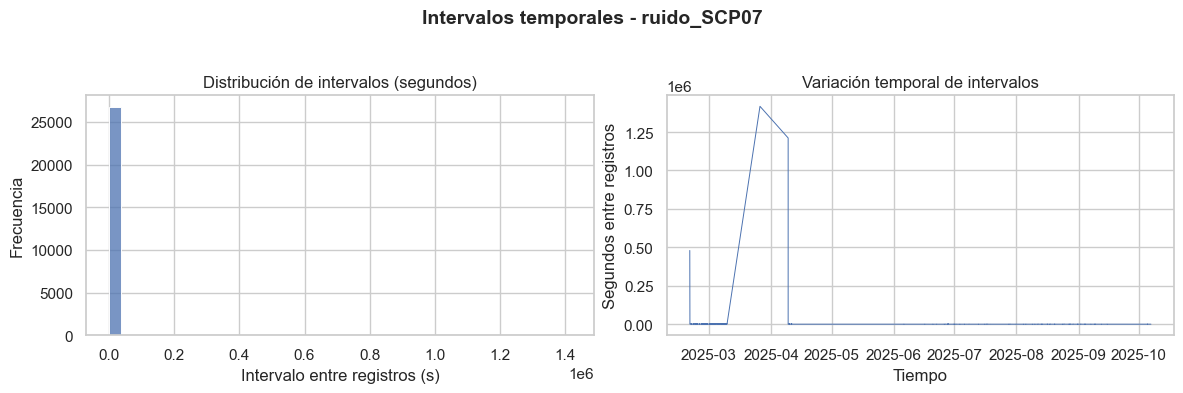

⚠️ Se detectaron 3 huecos grandes (>7200.0 s):

=== Análisis de intervalos temporales: ruido_SCP08 ===


,count,mean,std,min,25%,50%,75%,90%,95%,max
diff_segundos,31003.0,638.93,303.88,0.0,600.0,660.0,660.0,660.0,660.0,4860.0


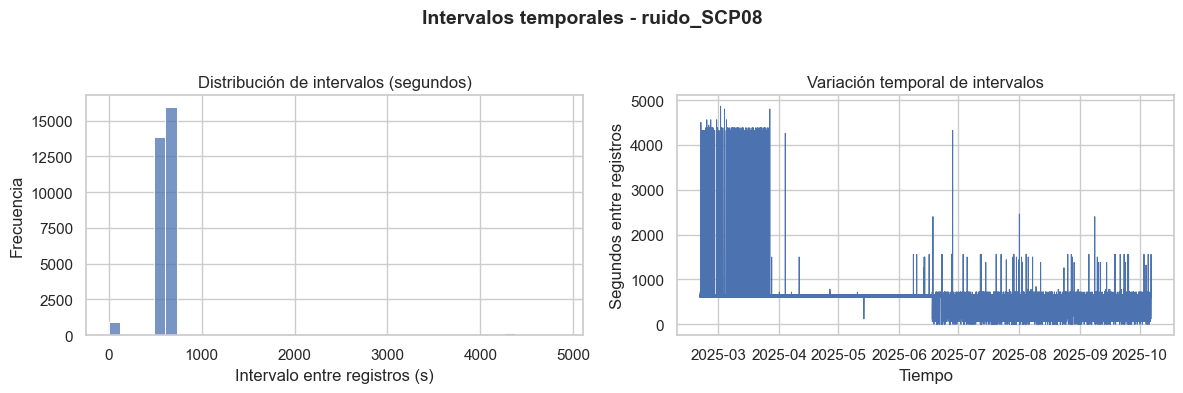

No se detectaron huecos temporales significativos.

=== Análisis de intervalos temporales: ruido_SCP09 ===


,count,mean,std,min,25%,50%,75%,90%,95%,max
diff_segundos,23648.0,837.82,31369.1,60.0,600.0,660.0,660.0,660.0,660.0,4824540.0


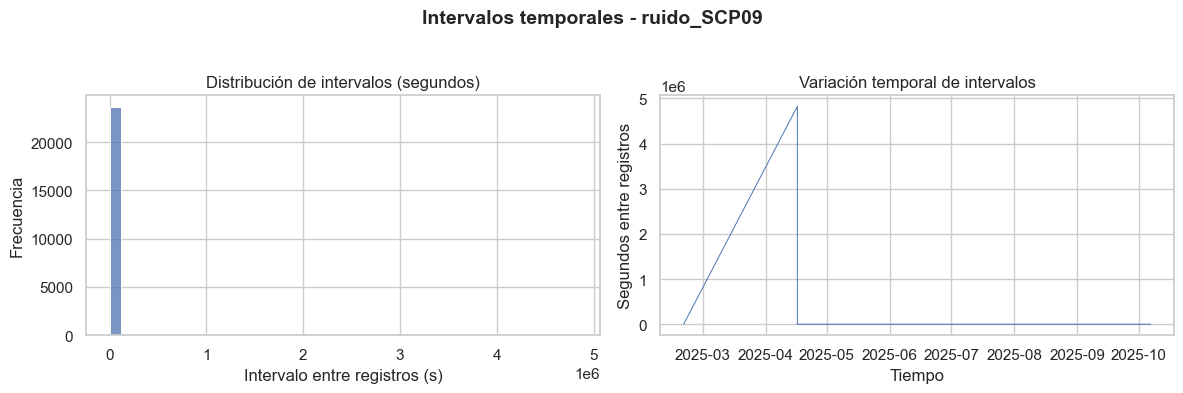

⚠️ Se detectaron 1 huecos grandes (>7200.0 s):

=== Análisis de intervalos temporales: ruido_SCP13 ===


,count,mean,std,min,25%,50%,75%,90%,95%,max
diff_segundos,30487.0,1037.15,47740.34,0.0,600.0,660.0,660.0,660.0,660.0,8287980.0


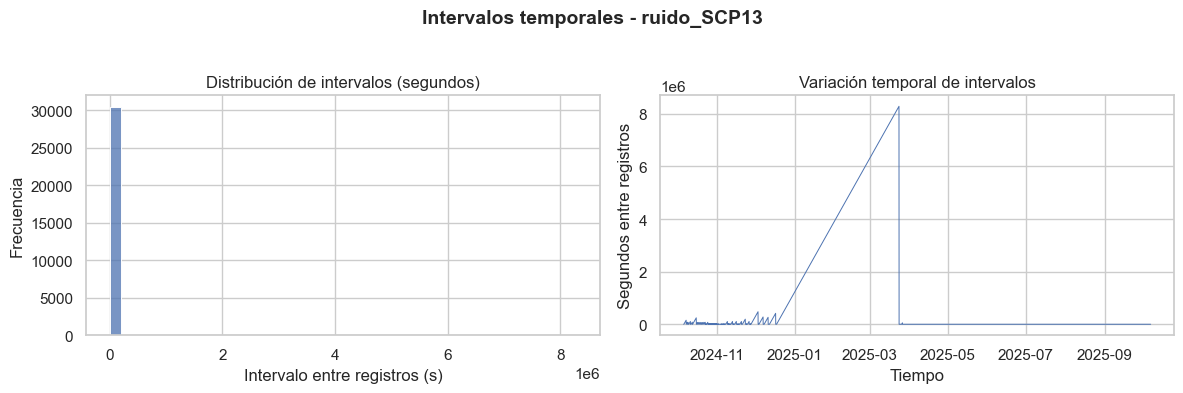

⚠️ Se detectaron 58 huecos grandes (>7200.0 s):

=== Análisis de intervalos temporales: ruido_SCP16 ===


,count,mean,std,min,25%,50%,75%,90%,95%,max
diff_segundos,23169.0,646.66,1657.24,0.0,600.0,660.0,660.0,660.0,660.0,251760.0


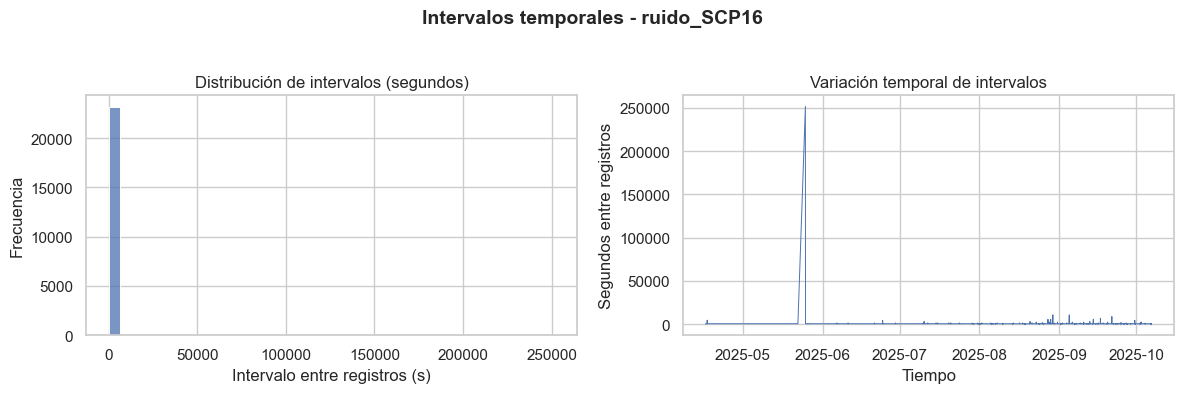

⚠️ Se detectaron 4 huecos grandes (>7200.0 s):

=== Análisis de intervalos temporales: ruido_SCP17 ===


,count,mean,std,min,25%,50%,75%,90%,95%,max
diff_segundos,23762.0,630.89,130.62,0.0,600.0,660.0,660.0,660.0,660.0,17160.0


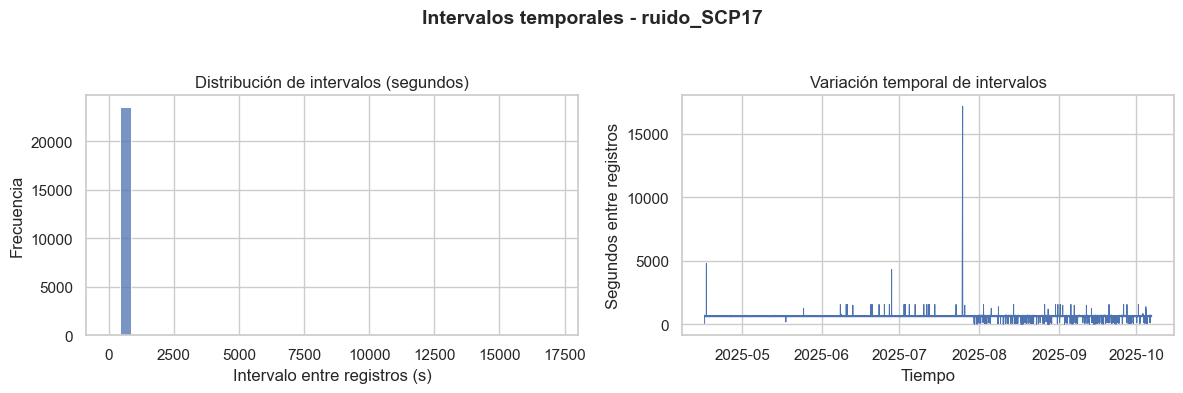

⚠️ Se detectaron 1 huecos grandes (>7200.0 s):


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================================
# Análisis de intervalos temporales
# =====================================================

def analizar_intervalos_tiempo(csv_path: str):
    """Analiza las diferencias entre timestamps consecutivos en un archivo CSV."""
    nombre_sensor = os.path.splitext(os.path.basename(csv_path))[0]
    print(f"\n=== Análisis de intervalos temporales: {nombre_sensor} ===")

    # Cargar datos y limpiar encabezados
    try:
        df = pd.read_csv(csv_path, sep=None, engine="python")
    except Exception:
        df = pd.read_csv(csv_path)

    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace(r"[^a-z0-9_]", "", regex=True)
    )

    # Verificar columnas esperadas
    if not {"fecha", "hora"}.issubset(df.columns):
        print("Columnas 'fecha' y 'hora' no encontradas.")
        return

    # Crear columna timestamp y ordenar
    df["timestamp"] = pd.to_datetime(df["fecha"] + " " + df["hora"], errors="coerce")
    df = df.dropna(subset=["timestamp"]).sort_values("timestamp")

    # Calcular diferencias en segundos
    df["diff_segundos"] = df["timestamp"].diff().dt.total_seconds()

    # Eliminar el primer NaN (no tiene anterior)
    df = df.dropna(subset=["diff_segundos"])

    if df.empty:
        print("No hay suficientes registros válidos para analizar intervalos.")
        return

    # Estadísticas descriptivas
    stats = df["diff_segundos"].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95]).round(2)
    display(stats.to_frame().T)

    # Visualización
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f"Intervalos temporales - {nombre_sensor}", fontsize=14, weight="bold")

    # Histograma de diferencias
    sns.histplot(df["diff_segundos"], bins=40, ax=axes[0])
    axes[0].set_title("Distribución de intervalos (segundos)")
    axes[0].set_xlabel("Intervalo entre registros (s)")
    axes[0].set_ylabel("Frecuencia")

    # Gráfico temporal de los intervalos
    axes[1].plot(df["timestamp"], df["diff_segundos"], linewidth=0.7)
    axes[1].set_title("Variación temporal de intervalos")
    axes[1].set_xlabel("Tiempo")
    axes[1].set_ylabel("Segundos entre registros")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Detectar posibles huecos anómalos
    umbral_hueco = 60 * 120 # 2 horas en segundos
    huecos = df[df["diff_segundos"] > umbral_hueco]
    if not huecos.empty:
        print(f"⚠️ Se detectaron {len(huecos)} huecos grandes (>{umbral_hueco:.1f} s):")
    else:
        print("No se detectaron huecos temporales significativos.")


# =====================================================
# Ejecutar el análisis en todos los sensores
# =====================================================

for csv_path in archivos_csv:
    try:
        analizar_intervalos_tiempo(csv_path)
    except Exception as e:
        print(f"Error procesando {csv_path}: {e}")


In [22]:
import pandas as pd
import numpy as np
import os

def calcular_completitud(csv_path: str):
    """Calcula completitud temporal y promedio de registros por día."""
    nombre_sensor = os.path.splitext(os.path.basename(csv_path))[0]

    try:
        df = pd.read_csv(csv_path, sep=None, engine="python")
    except Exception:
        df = pd.read_csv(csv_path)

    # Normalizar columnas
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace(r"[^a-z0-9_]", "", regex=True)
    )

    if "fecha" not in df.columns:
        return None

    df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")
    df = df.dropna(subset=["fecha"])

    if df.empty:
        return None

    # Calcular rango del sensor
    fecha_min = df["fecha"].min().normalize()
    fecha_max = df["fecha"].max().normalize()
    dias_totales = (fecha_max - fecha_min).days + 1
    dias_con_datos = df["fecha"].nunique()

    # Completitud basada en rango individual
    completitud_local = (dias_con_datos / dias_totales) * 100

    # Promedio de timestamps por día
    registros_por_dia = df.groupby("fecha").size().mean()

    return {
        "sensor": nombre_sensor,
        "fecha_inicio": fecha_min.date(),
        "fecha_fin": fecha_max.date(),
        "días_totales": dias_totales,
        "días_con_datos": dias_con_datos,
        "días_vacíos": dias_totales - dias_con_datos,
        "completitud_local_%": round(completitud_local, 2),
        "promedio_registros_por_día": round(registros_por_dia, 2)
    }

# =====================================================
# Procesar todos los sensores
# =====================================================

resumenes = [r for r in (calcular_completitud(p) for p in archivos_csv) if r]

if not resumenes:
    print("No se encontraron datos válidos para calcular completitud.")
else:
    df_resumen = pd.DataFrame(resumenes)

    # Calcular días totales máximo (rango global)
    fecha_global_min = df_resumen["fecha_inicio"].min()
    fecha_global_max = df_resumen["fecha_fin"].max()
    dias_totales_max = (pd.Timestamp(fecha_global_max) - pd.Timestamp(fecha_global_min)).days + 1
    df_resumen["días_totales_max"] = dias_totales_max

    # Completitud considerando rango global
    df_resumen["completitud_global_%"] = (
        (df_resumen["días_con_datos"] / df_resumen["días_totales_max"]) * 100
    ).round(2)

    # Mostrar resultados
    display(df_resumen)

    # Cálculo general ponderado
    total_dias_global = df_resumen["días_totales_max"].sum()
    total_dias_con_datos = df_resumen["días_con_datos"].sum()
    completitud_proyecto = (total_dias_con_datos / total_dias_global) * 100

    print(f"\nRango global del proyecto: {fecha_global_min} a {fecha_global_max}")
    print(f"Porcentaje global de completitud (rango total): {completitud_proyecto:.2f}%")


,sensor,fecha_inicio,fecha_fin,días_totales,días_con_datos,días_vacíos,completitud_local_%,promedio_registros_por_día,días_totales_max,completitud_global_%
0,ruido_SCP01,2024-10-06,2025-10-06,366,345,21,94.26,143.21,366,94.26
1,ruido_SCP06,2024-10-06,2025-10-06,366,358,8,97.81,121.24,366,97.81
2,ruido_SCP07,2025-02-13,2025-10-06,236,202,34,85.59,132.54,366,55.19
3,ruido_SCP08,2025-02-19,2025-10-06,230,230,0,100.00,134.80,366,62.84
4,ruido_SCP09,2025-02-19,2025-10-06,230,175,55,76.09,135.14,366,47.81
5,ruido_SCP13,2024-10-06,2025-10-06,366,256,110,69.95,119.09,366,69.95
6,ruido_SCP16,2025-04-16,2025-10-06,174,172,2,98.85,134.71,366,46.99
7,ruido_SCP17,2025-04-16,2025-10-06,174,174,0,100.00,136.57,366,47.54



Rango global del proyecto: 2024-10-06 a 2025-10-06
Porcentaje global de completitud (rango total): 65.30%


### Análisis de completitud en rango común (2025-04-16 a 2025-10-06)

Se pretende usar el rango comprendido entre el **16 de abril de 2025** y el **6 de octubre de 2025**, ya que corresponde al período en el que **todos los sensores presentan datos de forma simultánea**.  

Este rango común permite realizar un análisis comparativo coherente entre sensores, evitando sesgos asociados a fechas de instalación o desconexiones prolongadas. Además, se garantiza que las métricas de completitud se calculen sobre una base temporal uniforme.  

Dentro de este análisis se consideran:
- Los días con datos dentro del rango.
- Los días vacíos sin registros.
- El porcentaje de completitud respecto al total de días del rango.
- El promedio de registros por día.  

De esta forma, se busca obtener una evaluación homogénea de la calidad y cobertura de los datos registrados por cada sensor.


In [23]:
import pandas as pd
import numpy as np
import os

# -------------------------------------------------------
# Parámetros del rango de análisis
# -------------------------------------------------------
FECHA_MIN = pd.Timestamp("2025-04-16")
FECHA_MAX = pd.Timestamp("2025-10-06")
DIAS_RANGO = (FECHA_MAX - FECHA_MIN).days + 1  # cuenta total de días considerados

def calcular_completitud_rango_fijo(csv_path: str):
    """Calcula la completitud dentro de un rango común fijo de fechas."""
    nombre_sensor = os.path.splitext(os.path.basename(csv_path))[0]

    try:
        df = pd.read_csv(csv_path, sep=None, engine="python")
    except Exception:
        df = pd.read_csv(csv_path)

    # Normalizar nombres de columnas
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace(r"[^a-z0-9_]", "", regex=True)
    )

    if "fecha" not in df.columns:
        return None

    df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")
    df = df.dropna(subset=["fecha"])

    # Filtrar al rango común
    df = df[(df["fecha"] >= FECHA_MIN) & (df["fecha"] <= FECHA_MAX)]

    if df.empty:
        return {
            "sensor": nombre_sensor,
            "días_con_datos": 0,
            "días_vacíos": DIAS_RANGO,
            "completitud_%": 0.0,
            "promedio_registros_por_día": 0.0
        }

    # Días con datos
    dias_con_datos = df["fecha"].nunique()

    # Promedio de registros diarios
    promedio_registros_por_día = df.groupby("fecha").size().mean()

    # Completitud respecto al rango fijo
    completitud = (dias_con_datos / DIAS_RANGO) * 100

    return {
        "sensor": nombre_sensor,
        "fecha_inicio": FECHA_MIN.date(),
        "fecha_fin": FECHA_MAX.date(),
        "días_rango_total": DIAS_RANGO,
        "días_con_datos": dias_con_datos,
        "días_vacíos": DIAS_RANGO - dias_con_datos,
        "completitud_%": round(completitud, 2),
        "promedio_registros_por_día": round(promedio_registros_por_día, 2)
    }


# -------------------------------------------------------
# Ejecutar el análisis sobre todos los CSV
# -------------------------------------------------------
resumenes = [r for r in (calcular_completitud_rango_fijo(p) for p in archivos_csv) if r]

if resumenes:
    df_resumen_rango = pd.DataFrame(resumenes)
    display(df_resumen_rango)

    # Porcentaje global de completitud
    total_dias_con_datos = df_resumen_rango["días_con_datos"].sum()
    total_dias_posibles = len(df_resumen_rango) * DIAS_RANGO
    completitud_global = (total_dias_con_datos / total_dias_posibles) * 100

    print(f"\nRango de análisis común: {FECHA_MIN.date()} a {FECHA_MAX.date()}")
    print(f"Días considerados: {DIAS_RANGO}")
    print(f"Porcentaje global de completitud: {completitud_global:.2f}%")
else:
    print("No se generaron resultados de completitud.")


,sensor,fecha_inicio,fecha_fin,días_rango_total,días_con_datos,días_vacíos,completitud_%,promedio_registros_por_día
0,ruido_SCP01,2025-04-16,2025-10-06,174,158,16,90.80,147.30
1,ruido_SCP06,2025-04-16,2025-10-06,174,174,0,100.00,136.83
2,ruido_SCP07,2025-04-16,2025-10-06,174,174,0,100.00,136.70
3,ruido_SCP08,2025-04-16,2025-10-06,174,174,0,100.00,140.72
4,ruido_SCP09,2025-04-16,2025-10-06,174,174,0,100.00,135.90
5,ruido_SCP13,2025-04-16,2025-10-06,174,174,0,100.00,136.84
6,ruido_SCP16,2025-04-16,2025-10-06,174,172,2,98.85,134.71
7,ruido_SCP17,2025-04-16,2025-10-06,174,174,0,100.00,136.57



Rango de análisis común: 2025-04-16 a 2025-10-06
Días considerados: 174
Porcentaje global de completitud: 98.71%
